# NLTK Book Ch.2 Exercises

In [241]:
##importing everything used in chapter

import nltk
from nltk.corpus import gutenberg
from nltk.corpus import webtext
from nltk.corpus import nps_chat
from nltk.corpus import brown
from nltk.corpus import reuters
from nltk.corpus import inaugural
from nltk.corpus import udhr
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import BracketParseCorpusReader
from nltk.corpus import stopwords
from nltk.corpus import swadesh
from nltk.corpus import toolbox
from nltk.corpus import wordnet as wn

1.Create a variable phrase containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.

In [8]:
phrase = ['Life', 'is', 'a', 'long', 'river']

phrase*2

sorted(phrase)

phrase[0:2]

phrase[2:] = ['like', 'a', 'box', 'of', 'chocolates']
phrase

['Life', 'is', 'like', 'a', 'box', 'of', 'chocolates']

2.Use the corpus module to explore austen-persuasion.txt. How many word tokens does this book have? How many word types?

In [20]:
persuasion = gutenberg.words('austen-persuasion.txt')

print(len([w for w in persuasion if w.isalpha()]))

84121


In [22]:
print(len(set(w.lower() for w in persuasion if w.isalpha())))

5739


3.Use the Brown corpus reader nltk.corpus.brown.words() or the Web text corpus reader nltk.corpus.webtext.words() to access some sample text in two different genres.

In [26]:
nltk.corpus.brown.words(categories = 'news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [27]:
nltk.corpus.brown.words(categories = 'editorial')

['Assembly', 'session', 'brought', 'much', 'good', ...]

4.Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

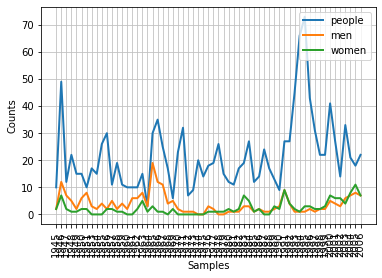

In [40]:
from nltk.corpus import state_union

cfd = nltk.ConditionalFreqDist(
        (target, fileid[:4])
        for fileid in state_union.fileids()
        for w in state_union.words(fileid)
        for target in ['men','women','people']
        if w.lower() == target)
cfd.plot()

5.Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: member_meronyms(), part_meronyms(), substance_meronyms(), member_holonyms(), part_holonyms(), and substance_holonyms().

In [60]:
wn.synsets('tree')

[Synset('tree.n.01'),
 Synset('tree.n.02'),
 Synset('tree.n.03'),
 Synset('corner.v.02'),
 Synset('tree.v.02'),
 Synset('tree.v.03'),
 Synset('tree.v.04')]

In [62]:
tree = wn.synset('tree.n.01')

print(tree.part_meronyms())
print(tree.member_meronyms())
print(tree.substance_meronyms())
print(tree.member_holonyms())
print(tree.part_holonyms())
print(tree.substance_holonyms())

[Synset('burl.n.02'), Synset('crown.n.07'), Synset('limb.n.02'), Synset('stump.n.01'), Synset('trunk.n.01')]
[]
[Synset('heartwood.n.01'), Synset('sapwood.n.01')]
[Synset('forest.n.01')]
[]
[]


6.In the discussion of comparative wordlists, we created an object called translate which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?

In [ ]:
#could have word spelled the same way in German and Spanish; program wouldn't know which language to translate from
# have user specify initial language (german or spanish)

7.According to Strunk and White's Elements of Style, the word however, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: However you advise him, he will probably do as he thinks best. (http://www.bartleby.com/141/strunk3.html) Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the LanguageLog posting "Fossilized prejudices about 'however'" at http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html

In [76]:
persuasion = nltk.Text(nltk.corpus.gutenberg.words('austen-persuasion.txt'))
persuasion.concordance('However', lines = 10)

Displaying 10 of 89 matches:
onceited , silly father . She had , however , one very intimate friend , a sens
early custom . But these measures , however good in themselves , were insuffici
ellynch Hall was to be let . This , however , was a profound secret , not to be
t immediate neighbourhood , which , however , had not suited him ; that acciden
e dues of a tenant . It succeeded , however ; and though Sir Walter must ever l
h , the former curate of Monkford , however suspicious appearances may be , but
good character and appearance ; and however Lady Russell might have asked yet f
siness no evil . She was assisted , however , by that perfect indifference and 
h the others . Something occurred , however , to give her a different duty . Ma
 , but can never alter plain ones . However , at any rate , as I have a great d


8.Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. 4.4).

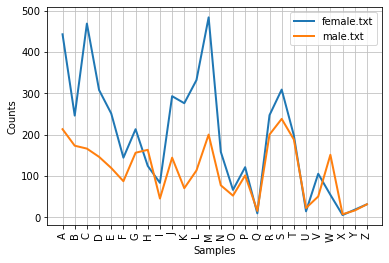

In [74]:
names = nltk.corpus.names

cfd = nltk.ConditionalFreqDist(
        (fileid, name[0]) #last letter of name
        for fileid in names.fileids()
        for name in names.words(fileid))
cfd.plot()

9.Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as monstrous in Moby Dick and in Sense and Sensibility?

In [101]:
news = nltk.corpus.brown.words(categories = 'news')
editorial = nltk.corpus.brown.words(categories = 'editorial')

print("Vocab News:", len(set(w.lower() for w in news if w.isalpha())))
print("Vocab Editorial", len(set(w.lower() for w in news if w.isalpha)))
print("Vocab Richness News:", len(set(w.lower() for w in news if w.isalpha()))/len([w for w in news if w.isalpha()]))
print("Vocab Richness Editorial:", len(set(w.lower() for w in editorial if w.isalpha()))/len([w for w in editorial if w.isalpha()]))

newstext = nltk.Text(news)
editorialtext = nltk.Text(editorial)

print("Air meaning news:")
newstext.similar('air')
print("Air meaning editorial:")
editorialtext.similar("air")

Vocab News: 11151
Vocab Editorial 13112
Vocab Richness News: 0.1334458246571408
Vocab Richness Editorial: 0.1561072680754288
Air meaning news:
state house evidence city number best legislature wife son first day
event board bill agency people history president university army
Air meaning editorial:
atmosphere is time past history west continent rebel floor task job
taxpayers imagination charter dead bones destructive inquirer census
darbuka


10.Read the BBC News article: UK's Vicky Pollards 'left behind' http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on LanguageLog, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.

In [100]:
def thirdwords(text):
    len_text = len([w for w in text if w.isalpha()])
    third = len_text/3
    
    fdist = FreqDist(w.lower() for w in text if w.isalpha())
    mc = fdist.most_common(100)
    
    count = 0
    cum = 0
    words = []
    
    for i in mc:
        if cum < third:
            cum = cum + i[1]
            count = count + 1
            words.append(i[0])
    print(words)
    print("total number of words: ", len_text)
    print("total frequency of third words: ", cum)
    print("number of words that make up a third: ", count)

In [101]:
news = brown.words(categories= 'romance')

thirdwords(news)

['the', 'and', 'to', 'a', 'of', 'he', 'was', 'i', 'in', 'she', 'it', 'had', 'her', 'that', 'his', 'you', 'with', 'for', 'at', 'but']
total number of words:  56857
total frequency of third words:  19268
number of words that make up a third:  20


11.Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

In [103]:
cfd = nltk.ConditionalFreqDist(
        (genre, word)
        for genre in brown.categories()
        for word in brown.words(categories=genre))
self_collective = ['me', 'my', 'I', 'mine', 'we', 'us', 'our', 'ours']
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
cfd.tabulate(conditions = genres, samples = self_collective)

                  me   my    I mine   we   us  our ours 
           news   29   34  179    3   77   12   55    1 
       religion   31   71  155    1  176   59   77    2 
        hobbies   16   39  154    2  100   23   77    3 
science_fiction   20   30   98    1   30    6    6    1 
        romance  193  156  951    8   78   42   25    1 
          humor   56   68  239    3   32   23   30    2 


12.The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

In [128]:
prondict = nltk.corpus.cmudict.dict()
len_prondict = len(prondict)

prons = 0

for key, value in prondict.items():
    if len(value) > 1:
        prons = prons + 1
print(prons)
print(len_prondict)
print(prons/len_prondict)


9241
123455
0.07485318537118789


13.What percentage of noun synsets have no hyponyms? You can get all noun synsets using wn.all_synsets('n').

In [137]:
nouns = wn.all_synsets('n')
len_nouns = len([synset for synset in wn.all_synsets('n')])
print(len_nouns)

no_hypo = 0

for synset in nouns:
    hyponyms = synset.hyponyms()
    if len(hyponyms) == 0:
        no_hypo += 1

(no_hypo/len_nouns)*100

82115


79.67119283931072

14.Define a function supergloss(s) that takes a synset s as its argument and returns a string consisting of the concatenation of the definition of s, and the definitions of all the hypernyms and hyponyms of s.

In [193]:
def supergloss(s):
    
    s = wn.synset(s)
    defines = [s.definition()]

    hypos = s.hyponyms()
    for hypo in hypos:
        defines.append(hypo.definition())
    for hyper in hypers:
        defines.append(hyper.definition())
    print('-'.join(defines))

In [194]:
supergloss('car.n.01')

a motor vehicle with four wheels; usually propelled by an internal combustion engine-a vehicle that takes people to and from hospitals-a car that has a long body and rear door with space behind rear seat-a car that is old and unreliable-a car driven by a person whose job is to take passengers where they want to go in exchange for money-a small and economical car-a car that has top that can be folded or removed-a car with two doors and front seats and a luggage compartment-a car in which policemen cruise the streets; equipped with radiotelephonic communications to headquarters-a car that is powered by electricity-a car with relatively low fuel efficiency-a car that resembles a convertible but has a fixed rigid top-a car having a hatchback door-an early term for an automobile-a car modified to increase its speed and acceleration-a car suitable for traveling over rough terrain-large luxurious car; usually driven by a chauffeur-a car that is lent as a replacement for one that is under repa

15.Write a program to find all words that occur at least three times in the Brown Corpus.

In [205]:
brown = nltk.corpus.brown.words()
atleastthree = []

for word in brown:
    if fdist[word] > 2:
        atleastthree.append(word)

16.Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

In [209]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

for category in nltk.corpus.brown.categories():
    words = nltk.corpus.brown.words(categories = category)
    print(category, ":", lexical_diversity(words))

adventure : 0.1279743878169075
belles_lettres : 0.10642071451679992
editorial : 0.16054152327770924
fiction : 0.1358194136199042
government : 0.11667641228232811
hobbies : 0.14493897625842492
humor : 0.23125144042406084
learned : 0.09268890745953554
lore : 0.13148804612915801
mystery : 0.12212912592488936
news : 0.14314696580941583
religion : 0.1617553745018909
reviews : 0.21192020440251572
romance : 0.12070492131044529
science_fiction : 0.22342778161713892


17.Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [220]:
def mostcomm(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w.lower() for w in text if w.lower() not in stopwords]
    fdist = FreqDist(w for w in content if w.isalpha())
    print(fdist.most_common(50))

In [221]:
text = ["i", "I", "hospital", "animals"]
mostcomm(text)

[('hospital', 1), ('animals', 1)]


18.Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [238]:
from nltk import bigrams

def mostcommbi(text):
    bigr = list(bigrams(text))
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w.lower() for w in text if w.lower() not in stopwords]
    fdist = FreqDist(b for b in bigr if b[0] not in stopwords and b[1] not in stopwords)
    print(fdist.most_common(50))

In [237]:
text = ['more', 'is', 'said', 'than', 'done', 'quack', 'duck']

mostcommbi(text)

[(('done', 'quack'), 1), (('quack', 'duck'), 1)]


19.Write a program to create a table of word frequencies by genre, like the one given in 1 for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings.

In [242]:
cfd = nltk.ConditionalFreqDist(
        (genre, word)
        for genre in brown.categories()
        for word in brown.words(categories=genre))
testwords = ['terror', 'Jesus', 'alien', 'cook', 'blush', 'cowbell']
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
cfd.tabulate(conditions = genres, samples = testwords)

                 terror   Jesus   alien    cook   blush cowbell 
           news       1       1       0       2       0       0 
       religion       0      33       0       0       0       0 
        hobbies       0       0       0       5       0       0 
science_fiction       0       0       3       1       0       0 
        romance       2       1       2       2       1       0 
          humor       1       0       0       0       0       0 


20.Write a function word_freq() that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.

In [261]:
def word_freq(word, section):
    fdist = FreqDist(brown.words(categories = section))
    return(fdist[word])
    

In [263]:
word_freq('Jesus', 'religion')

33

21.Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing Dictionary.

In [311]:
def guess_syll(text):
    text = [w.lower() for w in text if w.isalpha()]
    phs = ([ph for w in text for ph in prondict[w][0]])
    syllables = 0
    for syll in phs:
        if any(c.isnumeric() for c in syll):
            syllables = syllables + 1
    print(syllables)

In [314]:
text = ['wiggle', 'tail', 'crow', 'pigeon', 'we', 'you', "!", "I"]
guess_syll(text)

9


22.Define a function hedge(text) which processes a text and produces a new version with the word 'like' between every third word.

In [374]:
def hedge(text):
    new_text = []

    count = 0
    for w in text:
        new_text.append(w)
        if w.isalpha() == True:
            count += 1
        if count % 3 == 0:
            new_text.append("like")
    print(new_text)
        

In [375]:
text = ['wiggle', 'tail', '!', 'crow', 'pigeon', 'we', 'you', "I", ".", "dog", "fish"]

hedge(text)

['wiggle', 'tail', '!', 'crow', 'like', 'pigeon', 'we', 'you', 'like', 'I', '.', 'dog', 'fish', 'like']


23.Zipf's Law: Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.

a)Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?

b)Generate random text, e.g., using random.choice("abcdefg "), taking care to include the space character. You will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?


In [416]:
import pylab

##a
def zipf(text):

    words = [w.lower() for w in text if w.isalpha()]
    fdist = FreqDist(words)
    mc = fdist.most_common(100)

    rank = []
    freq = []
    
    for i in range(len(mc)):
        rank.append(i+1)
        freq.append(mc[i][1])

    pylab.plot(rank, freq)

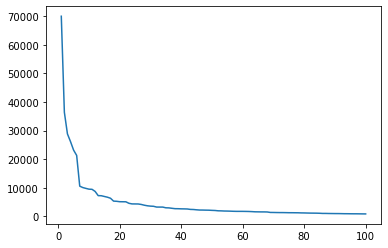

In [398]:
zipf(news)

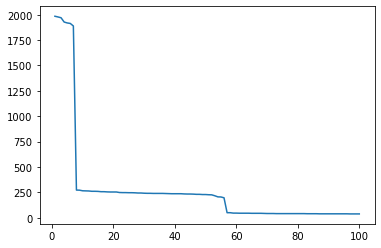

In [419]:
##b

import random

randtext = ''

for i in range(1000000):
    randtext = randtext + random.choice("abcdefg ")

zipf(randtext.split())

24.Modify the text generation program in 2.2 further, to do the following tasks:

a)Store the n most likely words in a list words then randomly choose a word from the list using random.choice(). (You will need to import random first.)

b)Select a particular genre, such as a section of the Brown Corpus, or a genesis translation, one of the Gutenberg texts, or one of the Web texts. Train the model on this corpus and get it to generate random text. You may have to experiment with different start words. How intelligible is the text? Discuss the strengths and weaknesses of this method of generating random text.

c)Now train your system using two distinct genres and experiment with generating text in the hybrid genre. Discuss your observations.


In [464]:
##a

import random

def generate_model_rand(text, n, num = 15):
    words = [w.lower() for w in text if w.isalpha()]
    fdist = FreqDist(words)
    mc = fdist.most_common(n)
    mclist = [i[0] for i in mc]
    randword = random.choice(mclist)
    for i in range(num):
        print(randword, end = ' ')
        randword = random.choice(mclist)

of to of in in he that i unto i he and his the to 

In [467]:
##b

generate_model_rand(brown.words(categories = 'news'), 100)

to man all in out last day him the can against day now such we 

In [468]:
## c

generate_model_rand(brown.words(categories = ['news', 'romance']), 100)

little can for what but other who here my has no her if back my 

25.Define a function find_language() that takes a string as its argument, and returns a list of languages that have that string as a word. Use the udhr corpus and limit your searches to files in the Latin-1 encoding.

In [496]:
def find_language(s):
    languages = []
    for ids in nltk.corpus.udhr.fileids():
        if '-Latin1' in ids:
            languages.append(ids)
    for l in languages:
        if s in nltk.corpus.udhr.words(l):
            print(l)
        

In [500]:
find_language('lair')

Javanese-Latin1


26.What is the branching factor of the noun hypernym hierarchy? I.e. for every noun synset that has hyponyms — or children in the hypernym hierarchy — how many do they have on average? You can get all noun synsets using wn.all_synsets('n').

In [506]:
total = wn.all_synsets('n')

hypos = 0
count = 0

for i in total:
    if len(i.hyponyms()) > 0:
        hypos += len(i.hyponyms())
        count += 1
print(hypos/count)  
           

4.543820763194153


27.The polysemy of a word is the number of senses it has. Using WordNet, we can determine that the noun dog has 7 senses with: len(wn.synsets('dog', 'n')). Compute the average polysemy of nouns, verbs, adjectives and adverbs according to WordNet.

In [520]:
## wordnet documentation provides this

## https://wordnet.princeton.edu/documentation/21-wnstats7wn


28.Use one of the predefined similarity measures to score the similarity of each of the following pairs of words. Rank the pairs in order of decreasing similarity. How close is your ranking to the order given here, an order that was established experimentally by (Miller & Charles, 1998): car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string.

In [545]:
pairs = [("car", "automobile"), ("gem", "jewel"), ("journey", "voyage")]

simpairs = []
for i in pairs:
    wordsy1 = wn.synsets(i[0])
    wordsy2 = wn.synsets(i[1])
    word1 = wordsy1[0]
    word2 = wordsy2[0]
    similar = word1.path_similarity(word2)
    simpairs.append((word1, word2, similar))
from operator import itemgetter
sorted(simpairs,key=itemgetter(2),reverse=True)

[(Synset('car.n.01'), Synset('car.n.01'), 1.0),
 (Synset('journey.n.01'), Synset('ocean_trip.n.01'), 0.25),
 (Synset('gem.n.01'), Synset('jewel.n.01'), 0.125)]